# Exploratory Data Analysis
Author: Prachitee Chouhan

In [134]:
!pip install gensim
!pip install wordcloud
!pip install textblob
!pip install spacy
!pip install textstat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
nltk.download('stopwords')
from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import gensim

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prachiteechouhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prachiteechouhan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prachiteechouhan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [4]:

df=pd.read_csv("product_marketing_meeting.csv")
df.head()

,Unnamed: 0,start_time,end_time,speaker_label,text
0,0,0.000150,0.025817,spk_0,I can record
1,1,0.046983,0.083983,spk_0,and we don't have a ton
2,2,0.096333,0.125650,spk_0,"of items to get to,"
3,3,0.132333,0.142000,spk_0,uh
4,4,0.154650,0.208983,spk_0,and I might be able to do one that might be fun


Attribute description:
speaker_label:Speaker name,
text: transcript,
start_time: starting timestamp,and
end_time: ending timestamp.

In [5]:
df.shape

(968, 5)

In [6]:
df.dtypes

Unnamed: 0         int64
start_time       float64
end_time         float64
speaker_label     object
text              object
dtype: object

Checking for null values

In [7]:
df.isna().sum()

Unnamed: 0       0
start_time       0
end_time         0
speaker_label    0
text             0
dtype: int64

After manually checking the transcript, there are no speaker if same speaker is speaking.
So, replacing NaN with before speaker name.

In [8]:
#for i in range(len(df)):
#    if pd.isna(df['speaker'].iloc[i]):
#        df['speaker'][i]=df['speaker'][i-1]

In [9]:
#Combine the adjacent speaker if they have same label

In [10]:
import warnings
warnings.filterwarnings("ignore")
to_remove=[]
for i, record in df.iterrows():
    if i < len(df)-1:
        if df.speaker_label[i]== df.speaker_label[i+1]:
            df['text'][i]=df['text'][i]+" "+df['text'][i+1]
            to_remove.append(i+1)

df = df.drop(to_remove).reset_index(drop=True)
            
             

In [11]:
df.head()

,Unnamed: 0,start_time,end_time,speaker_label,text
0,0,0.000150,0.025817,spk_0,I can record and we don't have a ton
1,29,1.203483,1.265167,spk_1,I thought we had in Slack sort of farmed each ...
2,30,1.277667,1.286333,spk_0,"That's so I guess that the next, so it looks like"
3,44,1.947317,2.007650,spk_2,"uh, on Slack only and on the issue actually?"
4,45,2.014333,2.076833,spk_3,"Yeah, same, not in, not in real time, but, you..."


In [13]:
speaker=df['speaker_label'].unique()
print(f"Unique speaker name: {speaker}")

Unique speaker name: ['spk_0' 'spk_1' 'spk_2' 'spk_3' 'spk_4' 'spk_5' 'spk_6']


In [16]:
group_by_speaker=df.groupby(['speaker_label'])['text'].count()
group_by_speaker

speaker_label
spk_0    48
spk_1    20
spk_2    11
spk_3    26
spk_4    16
spk_5     9
spk_6    14
Name: text, dtype: int64

##Checking how long the text are
Character count
Word count
Mean word length
Mean sentence length

In [144]:
mean_character_count = df['text'].str.len().mean()
print(f"Mean of number of character in each row {mean_character_count}")

Mean of number of character in each row 56.99305555555556


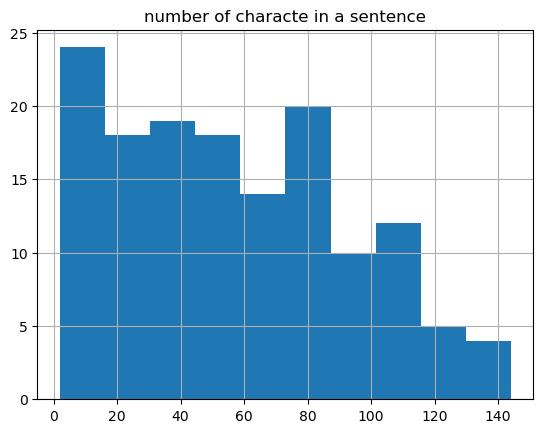

In [159]:
df['text'].str.len().hist()
plt.title('number of character in each row')
plt.show()

The graph says that number of character in text range from 10 to 150, mostly in between 10 to 130 with the mean of 57 words.

In [146]:
def word_count(text):
    text_list = text.split()
    return len(text_list)
wordcount = df['text'].apply(word_count)
wordcount

0       9
1      14
2      11
3       9
4      21
       ..
139    19
140    13
141     8
142    18
143     7
Name: text, Length: 144, dtype: int64

0       9
1      14
2      11
3       9
4      21
       ..
139    19
140    13
141     8
142    18
143     7
Name: text, Length: 144, dtype: int64

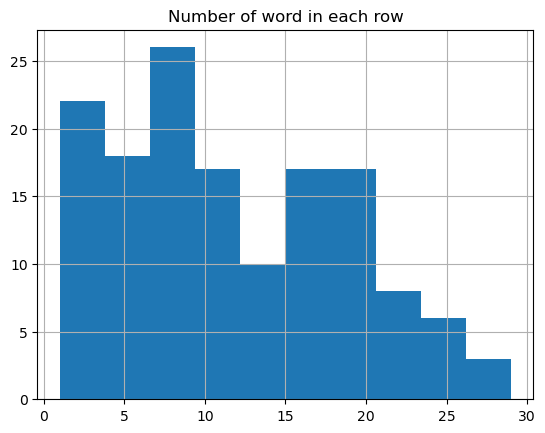

In [161]:
df['text'].str.split().map(lambda x: len(x)).hist()
plt.title('Number of word in each row')
plt.show()

The number of word in the text range from 1 to 27, mostly 1 to 22.

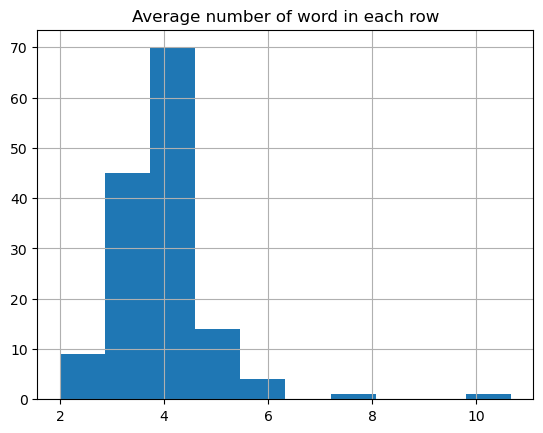

In [164]:
#avrage word count
df['text'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.title('Average number of word in each row')
plt.show()

The average number of word is 2 to 11, mostly 2 to 5 words. So, people generally don't speak long sentences.

# Understanding common words used

In [167]:

stop=set(stopwords.words('english'))

In [168]:
corpus=[]
new= df['text'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

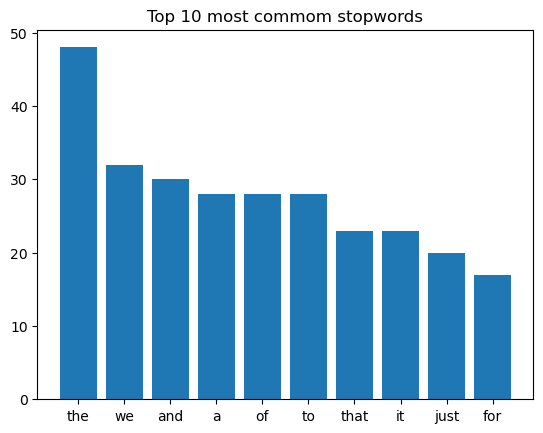

In [169]:
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y=zip(*top)
plt.bar(x,y)
plt.title('Top 10 most commom stopwords')
plt.show()

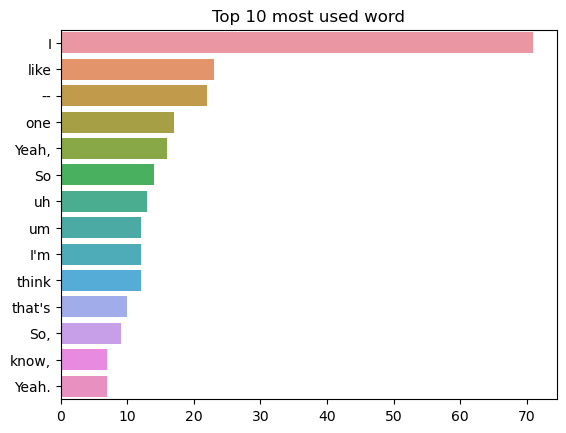

In [170]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stop):
        x.append(word)
        y.append(count)

sns.barplot(x=y,y=x)
plt.title('Top 10 most used word')
plt.show()

# Ngram exploration

In [171]:
#Bi-gram
cv = CountVectorizer(ngram_range=(2,2))
bigrams = cv.fit_transform(df['text'])

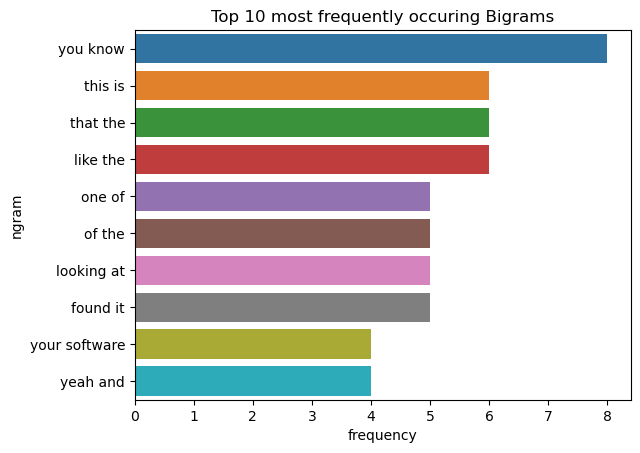

In [172]:
count_values = bigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 most frequently occuring Bigrams')
plt.show()

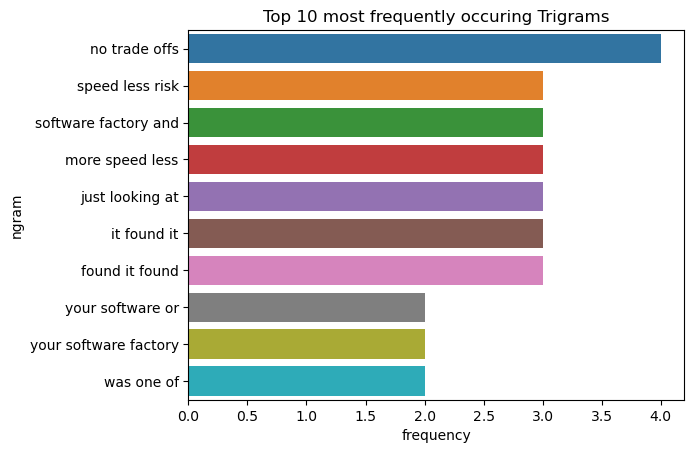

In [173]:
#tri-gram
tcv = CountVectorizer(ngram_range=(3,3))
trigrams = tcv.fit_transform(df['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in tcv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 most frequently occuring Trigrams')
plt.show()

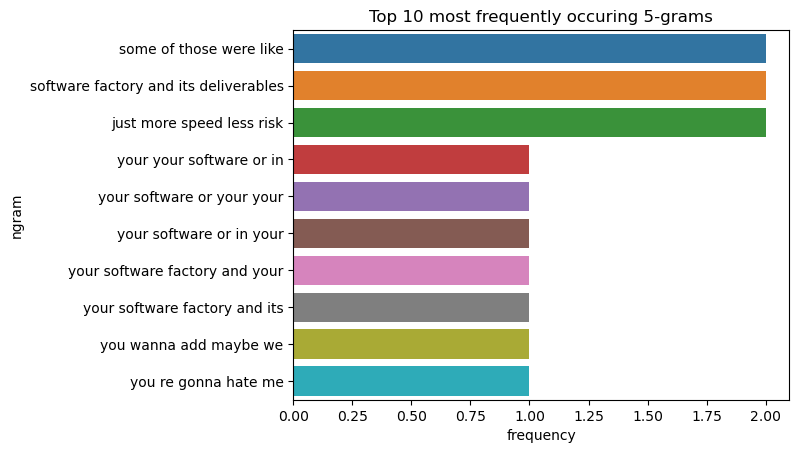

In [174]:
#5-gram
fcv = CountVectorizer(ngram_range=(5,5))
trigrams = fcv.fit_transform(df['text'])
count_values = trigrams.toarray().sum(axis=0)
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in fcv.vocabulary_.items()], reverse = True))
ngram_freq.columns = ["frequency", "ngram"]
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])
plt.title('Top 10 most frequently occuring 5-grams')
plt.show()

# Wordcloud

In [175]:


def preprocess_news(data):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in data['text']:
        words=[w for w in word_tokenize(news) if (w not in stop)]

        words=[lem.lemmatize(w) for w in words if len(w)>2]

        corpus.append(words)
    return corpus

corpus=preprocess_news(df)

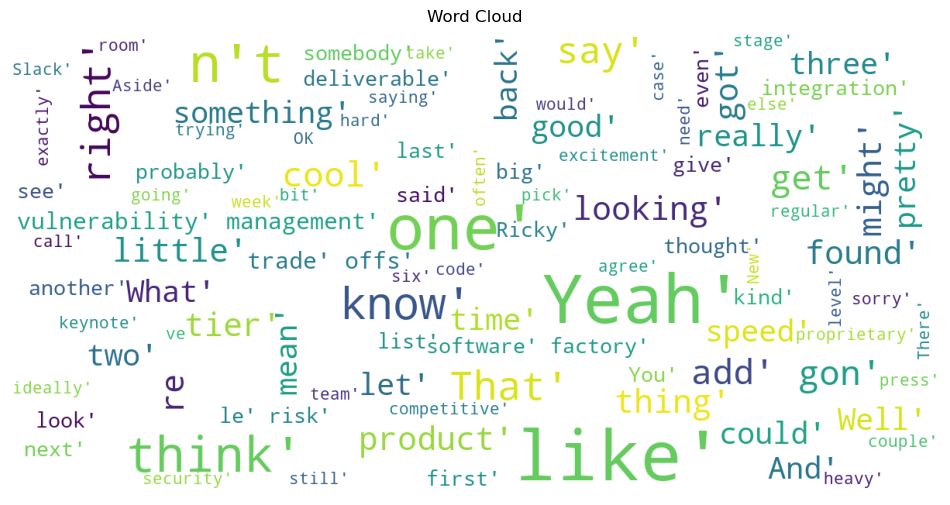

In [176]:

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.title('Word Cloud')

    plt.show()

show_wordcloud(corpus)

# Part-of-Speech tagging

Pronoun (PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
Noun (NN)- Joseph, London, table, cat, teacher, pen, city
Preposition (IN)- at, on, in, from, with, near, between, about, under
Determiner (DT)- articles like "a", "an", "the"
Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
.-punctuation


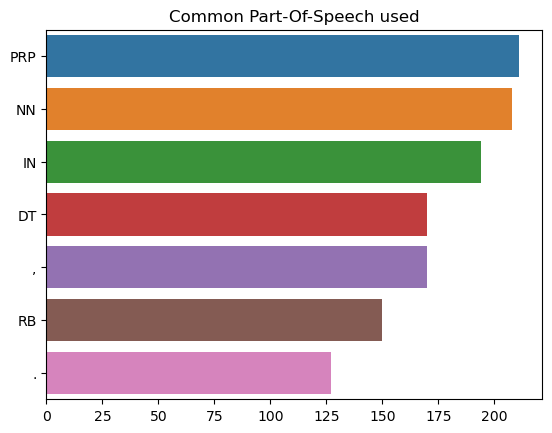

In [178]:
def pos(text):
    pos=nltk.pos_tag(word_tokenize(text))
    pos=list(map(list,zip(*pos)))[1]
    return pos

tags=df['text'].apply(lambda x : pos(x))
tags=[x for l in tags for x in l]
counter=Counter(tags)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)
plt.title('Common Part-Of-Speech used')
plt.show()

prououns are used much in meetings. Lets see, which NN are used most.

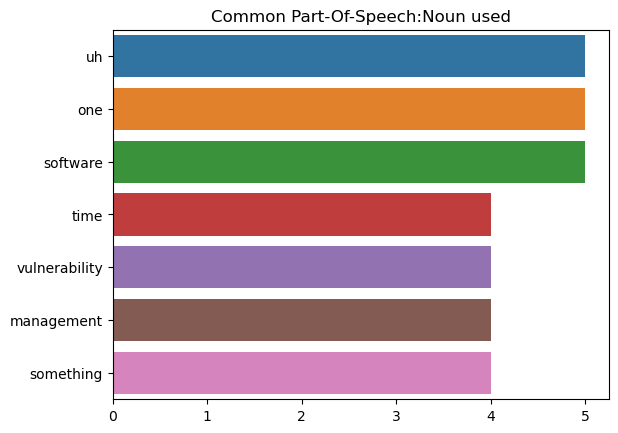

In [179]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj
words=df['text'].apply(lambda x : get_adjs(x))
words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))
sns.barplot(x=y,y=x)
plt.title('Common Part-Of-Speech:Noun used')
plt.show()

# Topic Extraction
Latent Dirichlet Allocation

In [180]:


dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [181]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()


/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[(0,
  '0.025*"one" + 0.025*"like" + 0.017*"That" + 0.017*"pretty" + 0.013*"somebody" + 0.013*"kind" + 0.013*"Yeah" + 0.011*"right" + 0.009*"might" + 0.009*"cool"'),
 (1,
  '0.030*"add" + 0.025*"software" + 0.016*"could" + 0.016*"gon" + 0.016*"got" + 0.016*"mean" + 0.016*"factory" + 0.016*"deliverable" + 0.011*"product" + 0.011*"integration"'),
 (2,
  '0.039*"Yeah" + 0.035*"like" + 0.020*"know" + 0.016*"one" + 0.016*"trade" + 0.016*"offs" + 0.013*"looking" + 0.011*"really" + 0.009*"back" + 0.009*"first"'),
 (3,
  '0.033*"like" + 0.033*"one" + 0.032*"think" + 0.030*"n\'t" + 0.025*"Yeah" + 0.014*"found" + 0.014*"say" + 0.011*"And" + 0.011*"know" + 0.011*"get"')]